# Beta Distributions

In [ ]:
import jax
import jax.numpy as jnp
from jax.scipy.stats import beta
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from probml_utils import savefig

In [ ]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    from probml_utils import latexify

    latexify(width_scale_factor=2, fig_height=2)

In [ ]:
LEGEND_SIZE = 8 if LATEXIFY else None

In [ ]:
def make_graph(data):
    x = data["x"]
    a_list = data["a_list"]
    b_list = data["b_list"]
    props = data["props"]

    for a, b, p in zip(a_list, b_list, props):
        y = beta.pdf(x, a, b)
        plt.plot(x, y, p, lw=2, label="a=%.1f,b=%.1f" % (a, b))

        plt.xlabel("$x$")
        plt.ylabel("$pdf$")
        plt.legend(loc="best", prop={"size": LEGEND_SIZE})
        plt.title("Beta distributions")
        sns.despine()
        savefig("betadist_latexified")

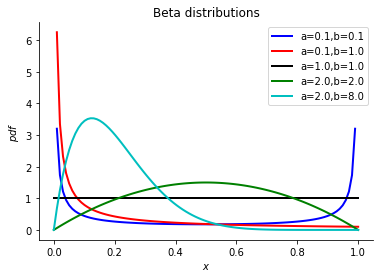

In [ ]:
x = jnp.linspace(0, 1, 100)
a_list = [0.1, 0.1, 1.0, 2.0, 2.0]
b_list = [0.1, 1.0, 1.0, 2.0, 8.0]
props = ["b", "r", "k", "g", "c"]
data = {"x": x, "a_list": a_list, "b_list": b_list, "props": props}
make_graph(data)

In [ ]:
from ipywidgets import interact


@interact(a=(0.1, 10), b=(0.1, 10))
def generate_random(a, b):
    data = {"x": jnp.linspace(0, 1, 100), "a_list": [a], "b_list": [b], "props": ["r"]}
    make_graph(data)
    plt.yticks(jnp.arange(0, 11, step=1))

interactive(children=(FloatSlider(value=5.05, description='a', max=10.0, min=0.1), FloatSlider(value=5.05, des…